## Create water mask in radar coordinate ##

This notebook show two ways of generating water mask in radar coordinates to facilitate InSAR processing in MintPy:

1. Using `generate_mask.py` based on DEM in radar coordiantes with `manually` selected threshold in height.
2. Using `wbd.py` from ISCE to download water mask in geo coordinates and radar-code it using geocode.py from MintPy.

In [1]:
## Examples to generate water mask.
%matplotlib inline
import os
import matplotlib.pyplot as plt
from mintpy.utils import readfile

Go to directory /Users/yunjunz/insarlab/PYSAR_EXAMPLE/FernandinaSenDT128/mintpy


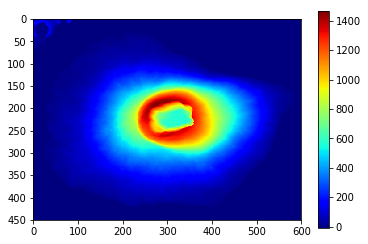

input geometry file: INPUTS/geometryRadar.h5
read INPUTS/geometryRadar.h5
create initial mask with the same size as the input file and all = 1
all pixels with nan value = 0
exclude pixels with value < -5.5
delete exsited file: waterMask.h5
create HDF5 file: waterMask.h5 with w mode
create dataset /mask of bool       in size of (450, 600)           with compression=None
finished writing to waterMask.h5
time used: 00 mins 0.0 secs.


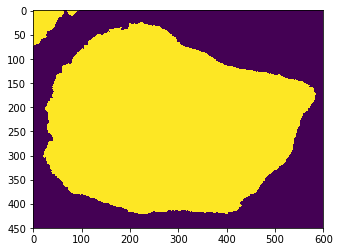

In [2]:
# option 1: Threshold based on DEM using generate_mask.py
work_dir = os.path.expanduser('~/insarlab/PYSAR_EXAMPLE/FernandinaSenDT128/mintpy')
os.chdir(work_dir)
print('Go to directory', work_dir)

# 1. use view.py to plot the height, and hover around to see the maximum height on the water
# Data value are shown in the status bar in the pop-up window
# Example: view.py INPUTS/geometryRadar.h5 height
# Below is how the figure looks like.
height, atr = readfile.read('inputs/geometryRadar.h5', datasetName='height')
plt.figure()
plt.imshow(height, cmap='jet')
plt.colorbar()
plt.show()
# Let's say here the maximum height value on the water is -6 m

# 2. use generate_mask.py to create a mask based on the threshold
!generate_mask.py INPUTS/geometryRadar.h5 -m -5.5 -o waterMask.h5
# Below is how the water mask looks like
water_mask = readfile.read('waterMask.h5')[0]
plt.figure()
plt.imshow(water_mask)
plt.show()

number of processor to be used: 1
--------------------------------------------------
resampling file: /Users/yunjunz/insarlab/DEM/swbdLat_S01_N00_Lon_W092_W091.wbd
reading swbdLat_S01_N00_Lon_W092_W091 from swbdLat_S01_N00_Lon_W092_W091.wbd ...
restrict fill value to False for bool type source data
nearest resampling with kd_tree using 1 processor cores in 0 segments ...
delete exsited file: waterBody.h5
create HDF5 file: waterBody.h5 with w mode
create dataset /swbdLat_S01_N00_Lon_W092_W091 of bool       in size of (450, 600)           with compression=None
finished writing to waterBody.h5
time used: 00 mins 2.4 secs.

input swbdLat_S01_N00_Lon_W092_W091 file: waterBody.h5
read waterBody.h5
create initial mask with the same size as the input file and all = 1
all pixels with nan value = 0
exclude pixels with value > 0.5
delete exsited file: waterMask2.h5
create HDF5 file: waterMask2.h5 with w mode
create dataset /mask of bool       in size of (450, 600)           with compression=None


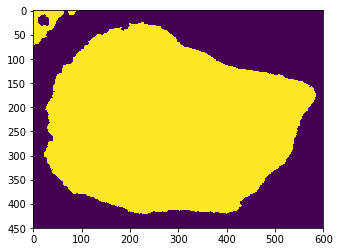

In [3]:
# option 2: use wbd.py from ISCE
!wbd.py -1 0 -92 -91  #This downloads water body mask from USGS and create file swbdLat_S01_N00_Lon_W092_W091.wbd, with 1 for water and 0 for land
!geocode.py ~/insarlab/DEM/swbdLat_S01_N00_Lon_W092_W091.wbd -l inputs/geometryRadar.h5 -o waterBody.h5 --geo2radar  #convert to radar coordinates
!generate_mask.py waterBody.h5 -M 0.5 -o waterMask2.h5  #reverse value on the water to: 0 for water and 1 for land

# Below is how the water mask looks like
water_mask = readfile.read('waterMask2.h5')[0]
plt.figure()
plt.imshow(water_mask)
plt.show()